In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df =  pd.read_excel("../Open Data/c1t4s.xlsx")

In [3]:
df

,Empresas de Trabajo Temporal,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91
0,CONTRATOS DE PUESTA A DISPOSICION :Divisiones ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,TOTAL,"01. Agricultura, ganadería, caza y servicios r...",02. Silvicultura y explotación forestal,03. Pesca y acuicultura,"05. Extracción de antracita, hulla y lignito",06. Extracción de crudo de petróleo y gas natural,07. Extracción de minerales metálicos,08. Otras industrias extractivas,...,"91. Actividades de bibliotecas, archivos, muse...",92. Actividades de juegos de azar y apuestas,"93. Actividades deportivas, recreativas y de e...",94. Actividades asociativas,"95. Reparación de ordenadores, efectos persona...",96. Otros servicios personales,97. Actividades de los hogares como empleadore...,98. Actividades de los hogares como productore...,99. Actividades de organizaciones y organismos...,NC. No Clasificables
4,2009,Enero,128947,17880,8,63,2,2,0,22,...,111,269,1453,560,147,361,33,0,5,142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,2024,Enero,312455,58569,17,26,0,1,1,11,...,272,260,2267,188,91,783,12,0,5,0
185,NaN,Febrero,282993,53665,29,5,0,0,1,13,...,451,255,2051,179,28,689,8,0,6,0
186,NaN,Marzo,300040,58812,19,19,2,0,2,6,...,596,240,2586,224,77,715,17,0,3,0
187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df.iloc[3:].reset_index(drop=True)
df.columns=df.iloc[0]

df=df.iloc[1:-2]
df.columns = ["Año", "Mes", *df.columns[2:]]

df['Año'] = df['Año'].ffill()

In [5]:
nulos_por_columna = df.isna().sum()

# Filtrar y mostrar solo las columnas con valores nulos
columnas_con_nulos = nulos_por_columna[nulos_por_columna != 0]

if not columnas_con_nulos.empty:
    print("Cantidad de valores nulos por columna:")
    print(columnas_con_nulos)
else:
    print("No hay valores nulos en el DataFrame.")

No hay valores nulos en el DataFrame.


In [6]:
df

,Año,Mes,TOTAL,"01. Agricultura, ganadería, caza y servicios relacionados con las mismas",02. Silvicultura y explotación forestal,03. Pesca y acuicultura,"05. Extracción de antracita, hulla y lignito",06. Extracción de crudo de petróleo y gas natural,07. Extracción de minerales metálicos,08. Otras industrias extractivas,...,"91. Actividades de bibliotecas, archivos, museos y otras actividades culturales",92. Actividades de juegos de azar y apuestas,"93. Actividades deportivas, recreativas y de entretenimiento",94. Actividades asociativas,"95. Reparación de ordenadores, efectos personales y artículos de uso doméstico",96. Otros servicios personales,97. Actividades de los hogares como empleadores de personal doméstico,98. Actividades de los hogares como productores de bienes y servicios para uso propio,99. Actividades de organizaciones y organismos extraterritoriales,NC. No Clasificables
1,2009,Enero,128947,17880,8,63,2,2,0,22,...,111,269,1453,560,147,361,33,0,5,142
2,2009,Febrero,100722,12999,1,32,0,0,0,6,...,188,285,1027,489,106,290,11,0,5,71
3,2009,Marzo,111494,10533,9,60,1,0,0,4,...,4,82,1451,652,84,359,26,0,2,84
4,2009,Abril,120636,15965,0,72,0,0,0,13,...,126,559,1404,530,76,268,20,0,6,99
5,2009,Mayo,139572,19964,0,77,0,0,0,12,...,256,398,2224,650,81,368,23,0,7,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2023,Noviembre,352164,61541,15,48,0,0,1,9,...,396,389,2410,225,115,604,34,0,6,0
180,2023,Diciembre,306616,52681,13,24,0,0,6,5,...,470,370,2611,249,81,613,22,0,2,0
181,2024,Enero,312455,58569,17,26,0,1,1,11,...,272,260,2267,188,91,783,12,0,5,0
182,2024,Febrero,282993,53665,29,5,0,0,1,13,...,451,255,2051,179,28,689,8,0,6,0


In [7]:
sectores = df.columns[3:-1]  # Esto asume que los sectores comienzan desde la cuarta columna hasta la penúltima

# Crear un nuevo DataFrame para almacenar la distribución de empleos por sector
distribucion_por_sector = pd.DataFrame()

# Calcular la suma de empleos por sector para cada fila (mes y año)
for sector in sectores:
    distribucion_por_sector[sector] = df[sector]

# Agregar una columna con la suma total de empleos por mes y año
distribucion_por_sector['Total Empleos'] = df['TOTAL']

# Mostrar el DataFrame resultante
distribucion_por_sector

,"01. Agricultura, ganadería, caza y servicios relacionados con las mismas",02. Silvicultura y explotación forestal,03. Pesca y acuicultura,"05. Extracción de antracita, hulla y lignito",06. Extracción de crudo de petróleo y gas natural,07. Extracción de minerales metálicos,08. Otras industrias extractivas,09. Actividades de apoyo a las industrias extractivas,10. Industria de la alimentación,11. Fabricación de bebidas,...,"91. Actividades de bibliotecas, archivos, museos y otras actividades culturales",92. Actividades de juegos de azar y apuestas,"93. Actividades deportivas, recreativas y de entretenimiento",94. Actividades asociativas,"95. Reparación de ordenadores, efectos personales y artículos de uso doméstico",96. Otros servicios personales,97. Actividades de los hogares como empleadores de personal doméstico,98. Actividades de los hogares como productores de bienes y servicios para uso propio,99. Actividades de organizaciones y organismos extraterritoriales,Total Empleos
1,17880,8,63,2,2,0,22,5,12807,1116,...,111,269,1453,560,147,361,33,0,5,128947
2,12999,1,32,0,0,0,6,0,10336,779,...,188,285,1027,489,106,290,11,0,5,100722
3,10533,9,60,1,0,0,4,0,11246,934,...,4,82,1451,652,84,359,26,0,2,111494
4,15965,0,72,0,0,0,13,1,12883,1177,...,126,559,1404,530,76,268,20,0,6,120636
5,19964,0,77,0,0,0,12,0,11926,1216,...,256,398,2224,650,81,368,23,0,7,139572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,61541,15,48,0,0,1,9,1,36406,2054,...,396,389,2410,225,115,604,34,0,6,352164
180,52681,13,24,0,0,6,5,0,32436,1791,...,470,370,2611,249,81,613,22,0,2,306616
181,58569,17,26,0,1,1,11,0,36765,1730,...,272,260,2267,188,91,783,12,0,5,312455
182,53665,29,5,0,0,1,13,0,31507,1602,...,451,255,2051,179,28,689,8,0,6,282993


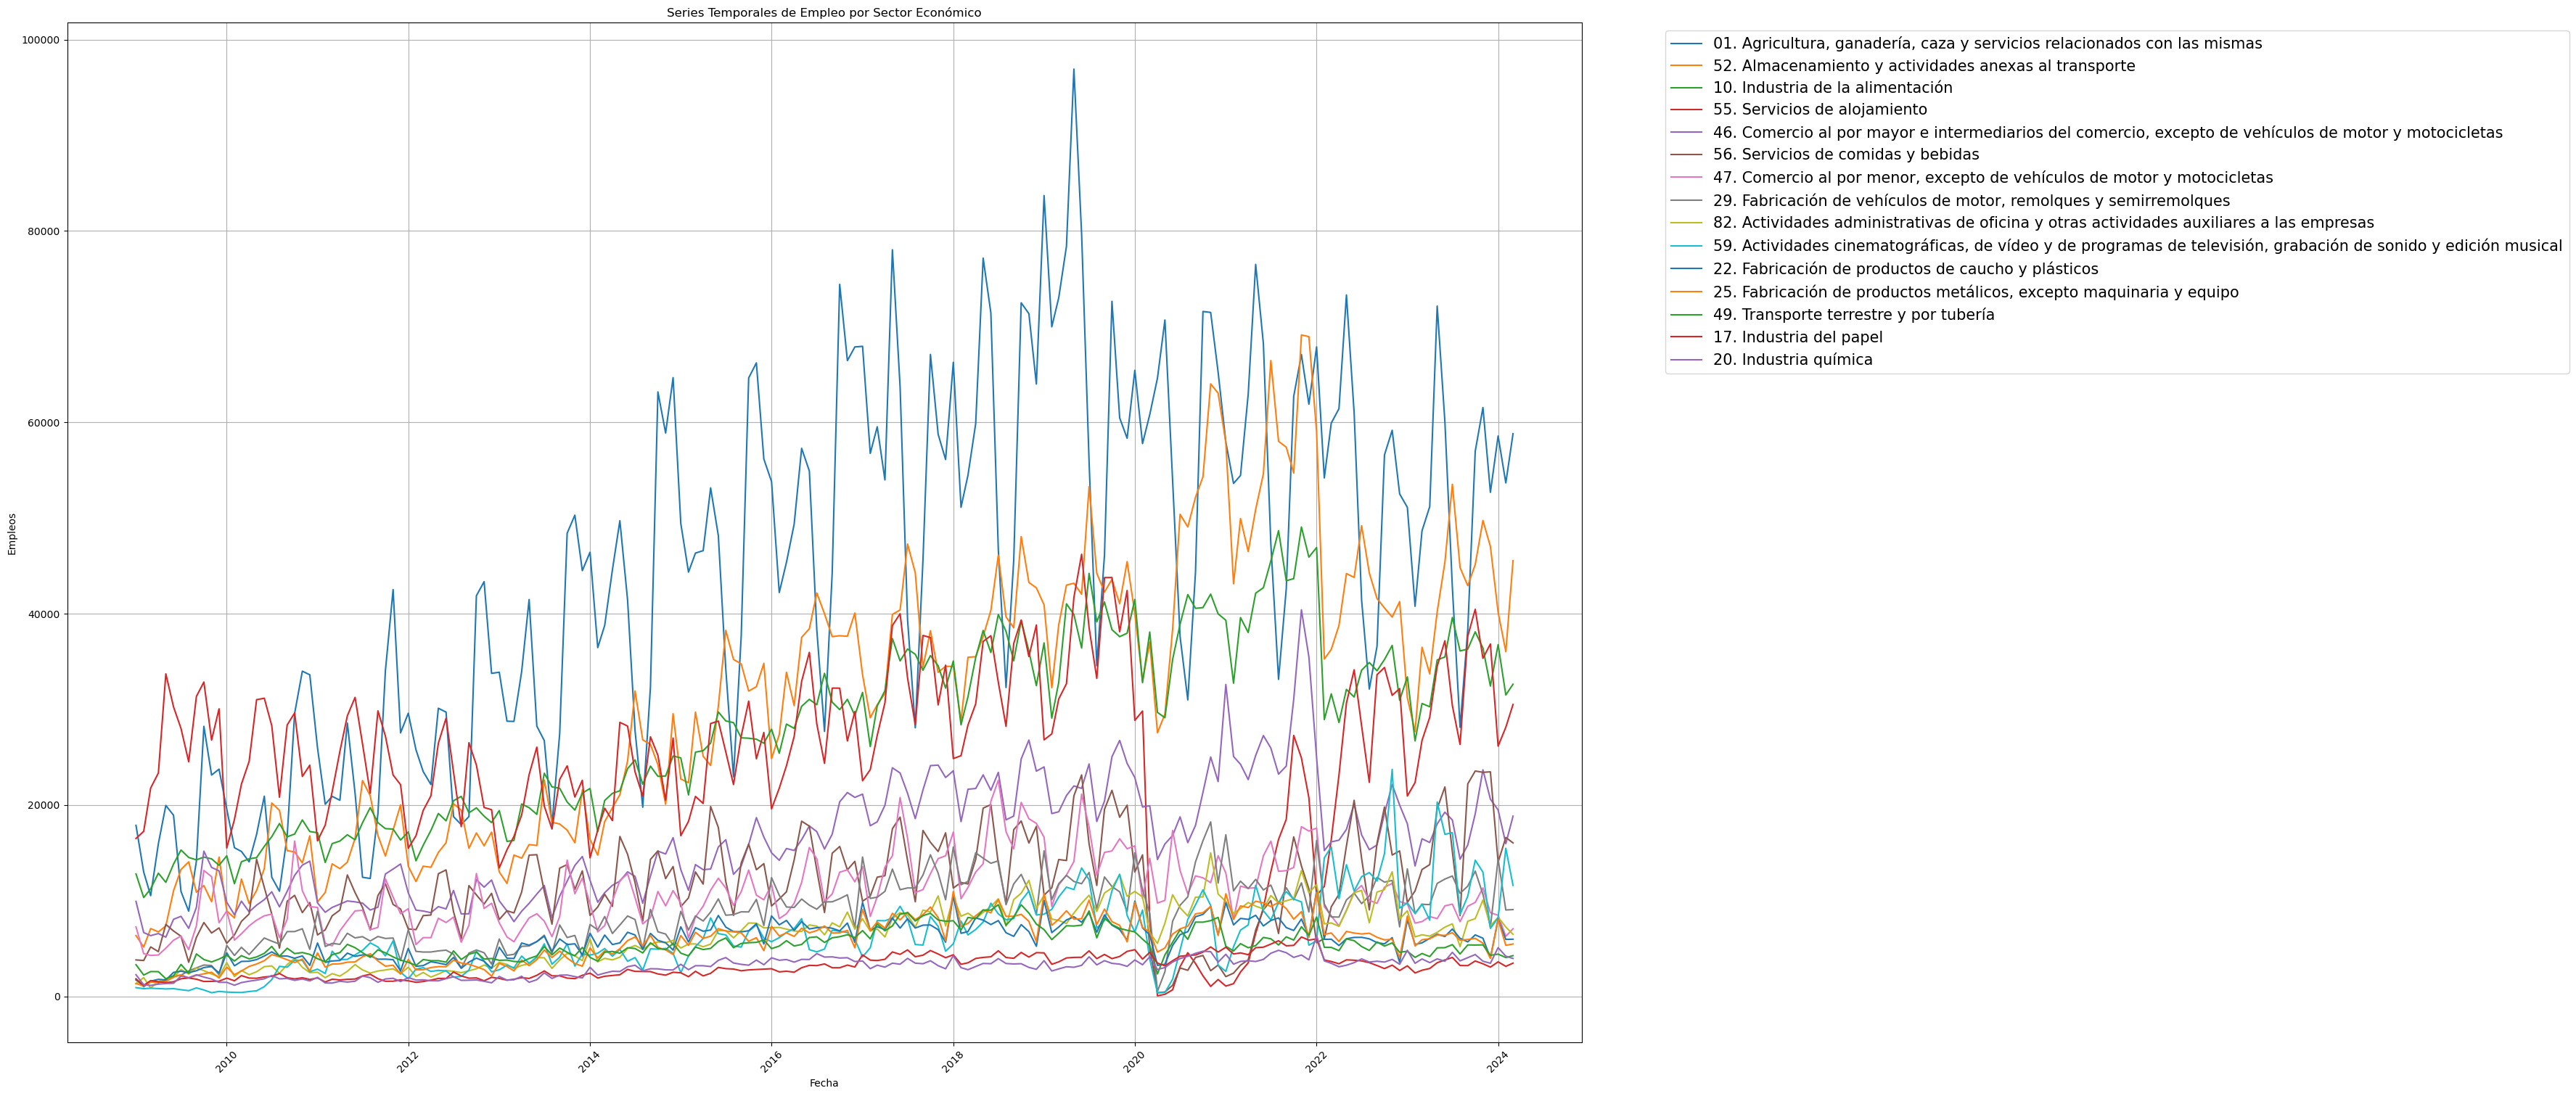

In [8]:
# Mapeo de nombres de meses en español a números de mes
meses = {
    'Enero': '01', 'Febrero': '02', 'Marzo': '03', 'Abril': '04', 'Mayo': '05', 'Junio': '06',
    'Julio': '07', 'Agosto': '08', 'Septiembre': '09', 'Octubre': '10', 'Noviembre': '11', 'Diciembre': '12'
}

# Convertir las columnas 'Año' y 'Mes' en formato de fecha
df['Fecha'] = pd.to_datetime(df['Año'].astype(str) + '-' + df['Mes'].map(meses), format='%Y-%m')

# Seleccionar las columnas relevantes que contienen los sectores económicos
sectores = df.columns[3:-1]

# Calcular la suma total de empleos por sector y ordenar de mayor a menor
total_empleos_por_sector = df[sectores].sum().sort_values(ascending=False)

# Seleccionar los 15 principales sectores por empleo
top_15_sectores = total_empleos_por_sector.head(15).index.tolist()

# Crear un gráfico de series temporales para los 15 principales sectores económicos
plt.figure(figsize=(22, 15))

for sector in top_15_sectores:
    plt.plot(df['Fecha'], df[sector], label=sector)

plt.title('Series Temporales de Empleo por Sector Económico')
plt.xlabel('Fecha')
plt.ylabel('Empleos')
plt.grid(True)
plt.tight_layout()

# Ajustar la posición de la leyenda fuera del área del gráfico
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), prop={'size': 15})

plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor visualización
plt.show()

In [9]:
# Seleccionar la serie temporal de la columna 'Agricultura'
df_agricultura = df[['Fecha','01. Agricultura, ganadería, caza y servicios relacionados con las mismas']]

In [10]:
df_agricultura.set_index(['Fecha'],inplace=True)
df_agricultura.index=pd.to_datetime(df_agricultura.index)

df_agricultura["agricultura"]=df_agricultura['01. Agricultura, ganadería, caza y servicios relacionados con las mismas']
df_agricultura.drop(columns="01. Agricultura, ganadería, caza y servicios relacionados con las mismas", inplace=True)

df_agricultura = df_agricultura.astype(float)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_11296\552255502.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agricultura["agricultura"]=df_agricultura['01. Agricultura, ganadería, caza y servicios relacionados con las mismas']
C:\Users\Usuario\AppData\Local\Temp\ipykernel_11296\552255502.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agricultura.drop(columns="01. Agricultura, ganadería, caza y servicios relacionados con las mismas", inplace=True)


In [11]:
df_agricultura

,agricultura
Fecha,
2009-01-01,17880.0
2009-02-01,12999.0
2009-03-01,10533.0
2009-04-01,15965.0
2009-05-01,19964.0
...,...
2023-11-01,61541.0
2023-12-01,52681.0
2024-01-01,58569.0


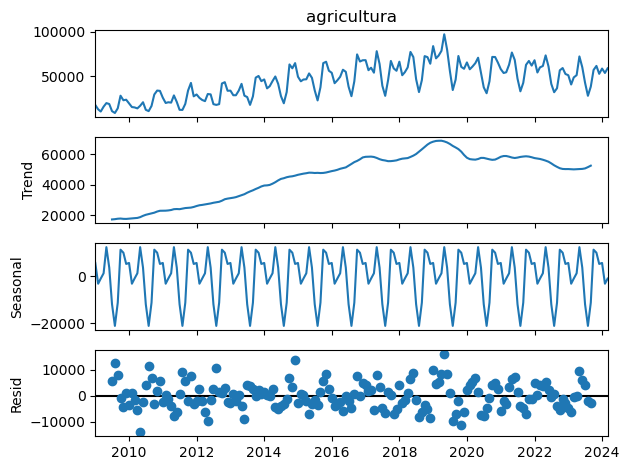

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Aplicar descomposición aditiva
agri_desc_add = seasonal_decompose(df_agricultura['agricultura'], model='additive',period=12)
agri_desc_add.plot()
plt.show()

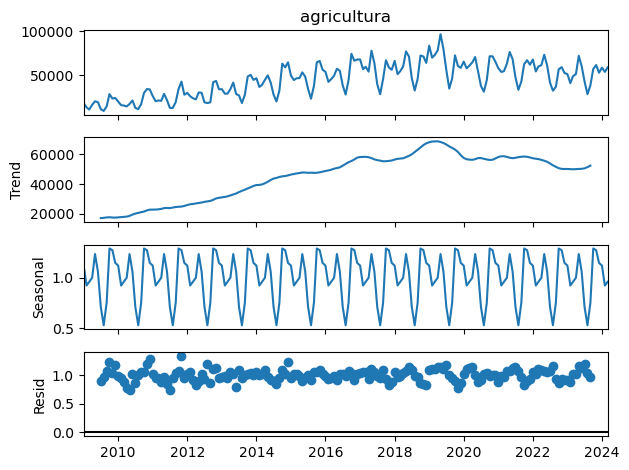

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Aplicar descomposición aditiva
agri_desc_mul = seasonal_decompose(df_agricultura['agricultura'], model='muliplicative',period=12)
agri_desc_mul.plot()
plt.show()

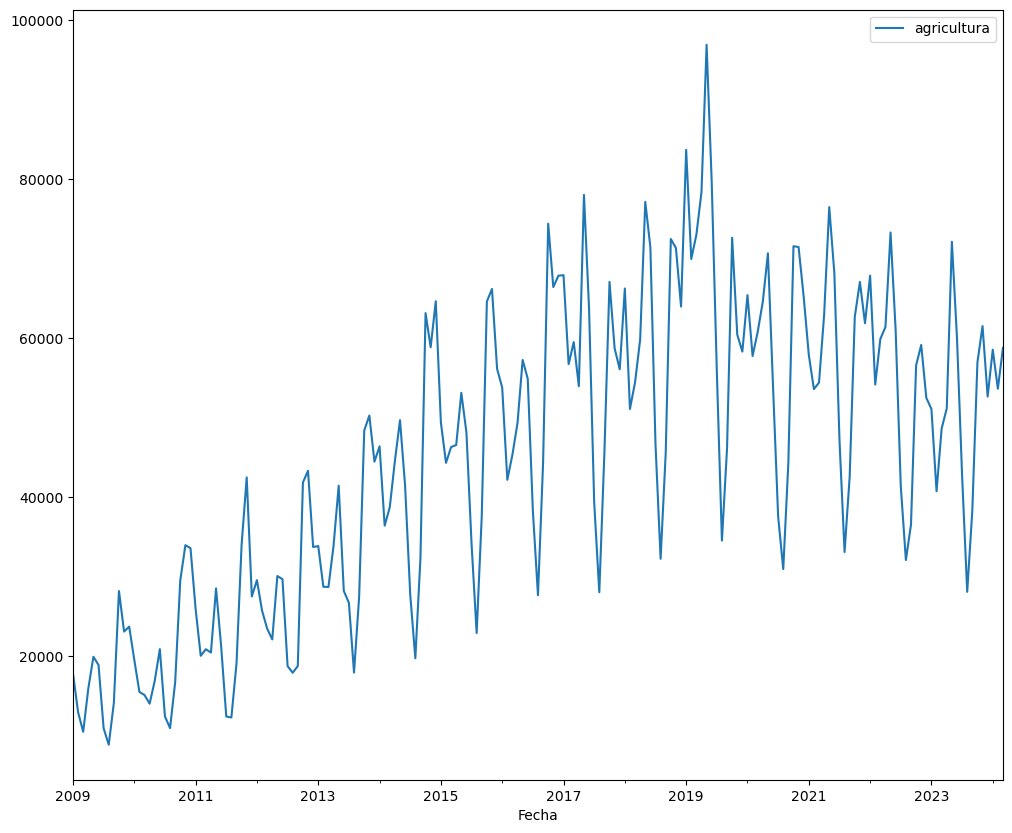

In [14]:
plt.rcParams["figure.figsize"] = (12,10)
df_agricultura.plot()
plt.show()

In [15]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [16]:
test_stationarity(df_agricultura)

Results of Dickey-Fuller Test:
Test Statistic                  -1.722608
p-value                          0.419503
#Lags Used                      13.000000
Number of Observations Used    169.000000
Critical Value (1%)             -3.469648
Critical Value (5%)             -2.878799
Critical Value (10%)            -2.575971
dtype: float64


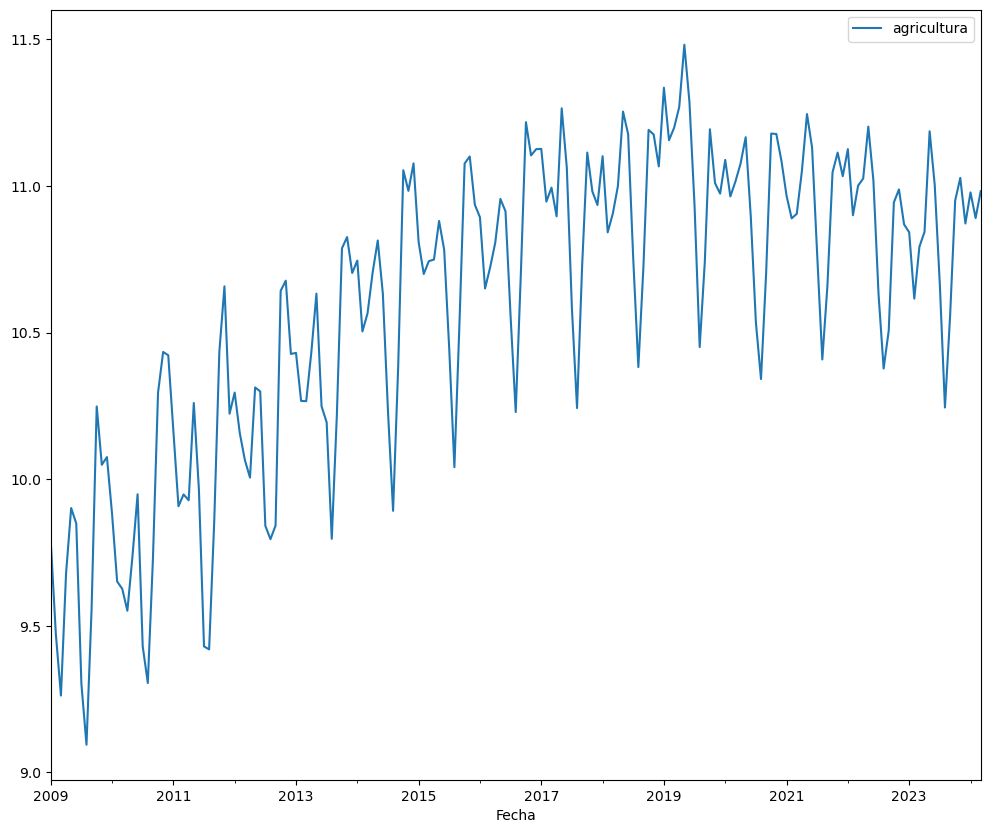

In [17]:
agri_log = np.log(df_agricultura)
agri_log.plot()
plt.show()

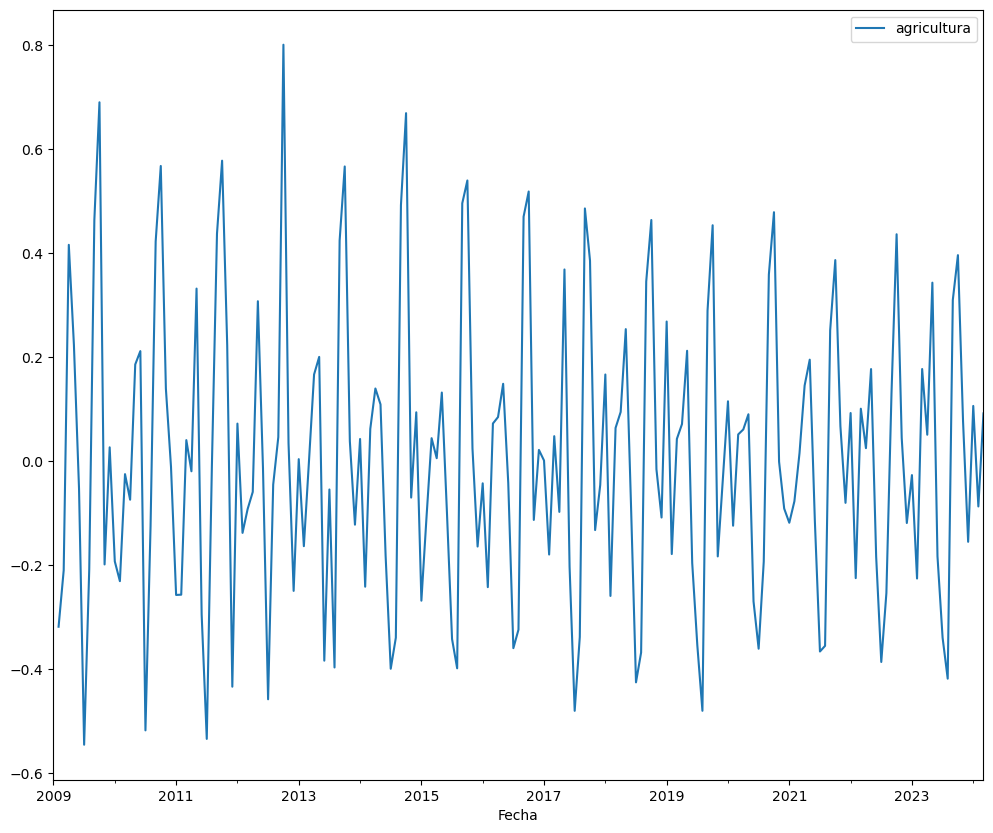

In [18]:
agri_diff_1 = agri_log.diff(periods=1)
agri_diff_1.plot()
plt.show()

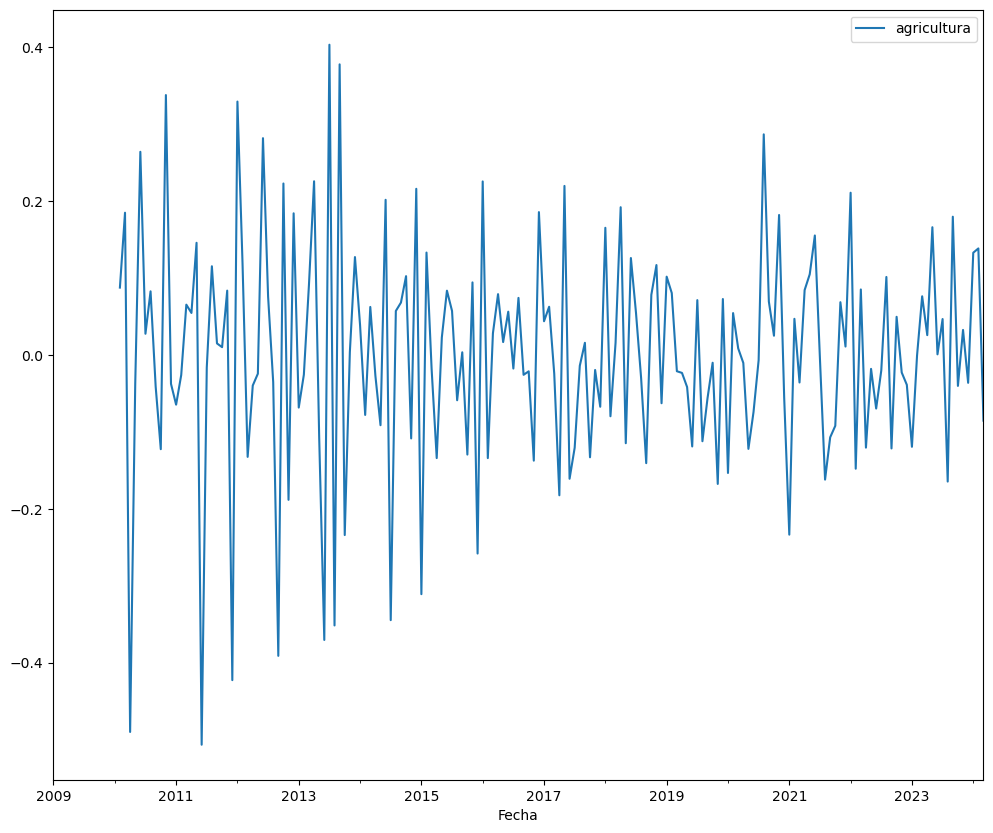

In [19]:
agri_diff_1_12 = agri_diff_1.diff(periods=12)
agri_diff_1_12.plot()
plt.show()

In [20]:
test_stationarity(agri_diff_1_12.dropna(inplace=False))

Results of Dickey-Fuller Test:
Test Statistic                -5.904784e+00
p-value                        2.724756e-07
#Lags Used                     1.200000e+01
Number of Observations Used    1.570000e+02
Critical Value (1%)           -3.472703e+00
Critical Value (5%)           -2.880132e+00
Critical Value (10%)          -2.576683e+00
dtype: float64


In [21]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [22]:
agri_tr = agri_log[:'2022-01-01']
agri_tst = agri_log['2022-02-01':]

In [23]:
import pmdarima as pm

# Ajustamos modelo arima step-wise con métrica AIC para la serie de vuelos
arima_auto = pm.auto_arima(agri_tr, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=12,              # frequency of series
                      d=1,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      #start_P=None, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=-184.940, Time=0.77 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=54.003, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-21.926, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=52.145, Time=0.04 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=-52.614, Time=0.53 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=-159.002, Time=0.59 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=-181.191, Time=1.39 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=-182.603, Time=1.49 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=38.522, Time=0.11 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=-105.500, Time=1.16 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=-180.720, Time=1.27 sec
 ARIMA(1,1,1)(2,0,2)[12] intercept   : AIC=-182.851, Time=1.73 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=-181.060, Time=0.63 sec
 ARIMA(1,1,0)(1,0,1)[12] interce

In [24]:
print(arima_auto.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  157
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                  99.348
Date:                            Mon, 17 Jun 2024   AIC                           -188.696
Time:                                    13:12:06   BIC                           -173.446
Sample:                                01-01-2009   HQIC                          -182.502
                                     - 01-01-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3933      0.109      3.596      0.000       0.179       0.608
ma.L1         -0.8690      0.062   

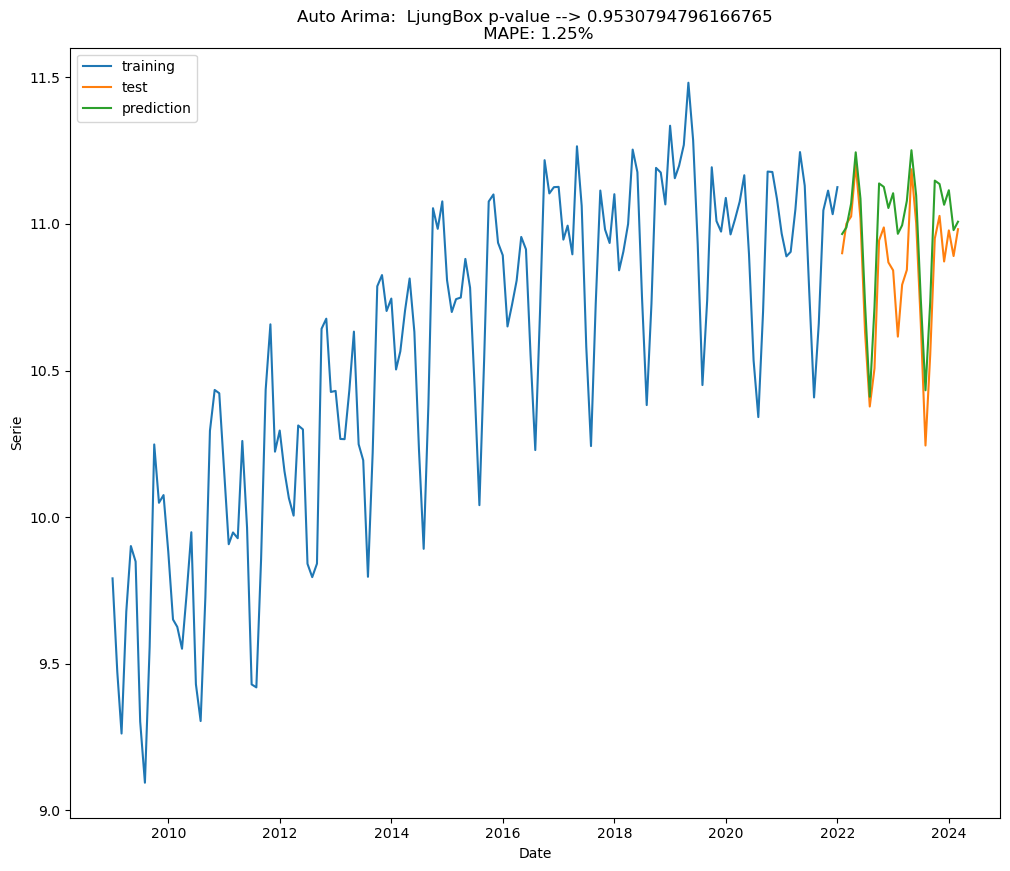

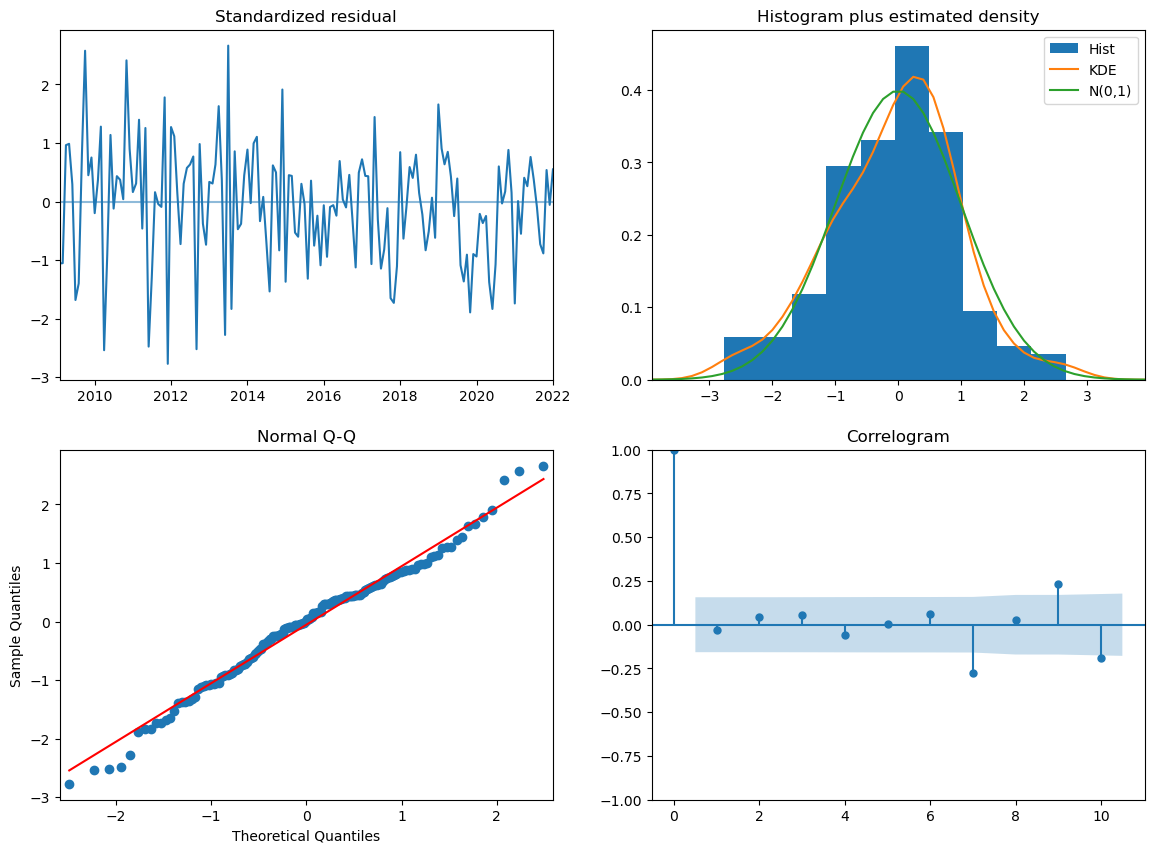

In [25]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

def eval_model_Aarima(model,tr,tst,name='Model',lags=12):
      lb = np.mean(sm.stats.acorr_ljungbox(model.resid(), lags=lags, return_df=True).lb_pvalue)
      pred = model.predict(n_periods=len(tst))
      fig1, ax = plt.subplots()
      ax.plot(tr, label='training')
      ax.plot(tst, label='test')
      ax.plot(pred, label='prediction')
      plt.legend(loc='upper left')
      tit = name + ":  LjungBox p-value --> " + str(lb) + "\n MAPE: " + str(round(mean_absolute_percentage_error(tst, pred)*100,2)) + "%"
      plt.title(tit)
      plt.ylabel('Serie')
      plt.xlabel('Date')
      plt.show()
      model.plot_diagnostics(figsize=(14,10))
      plt.show()
    
eval_model_Aarima(arima_auto,agri_tr,agri_tst,'Auto Arima')

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


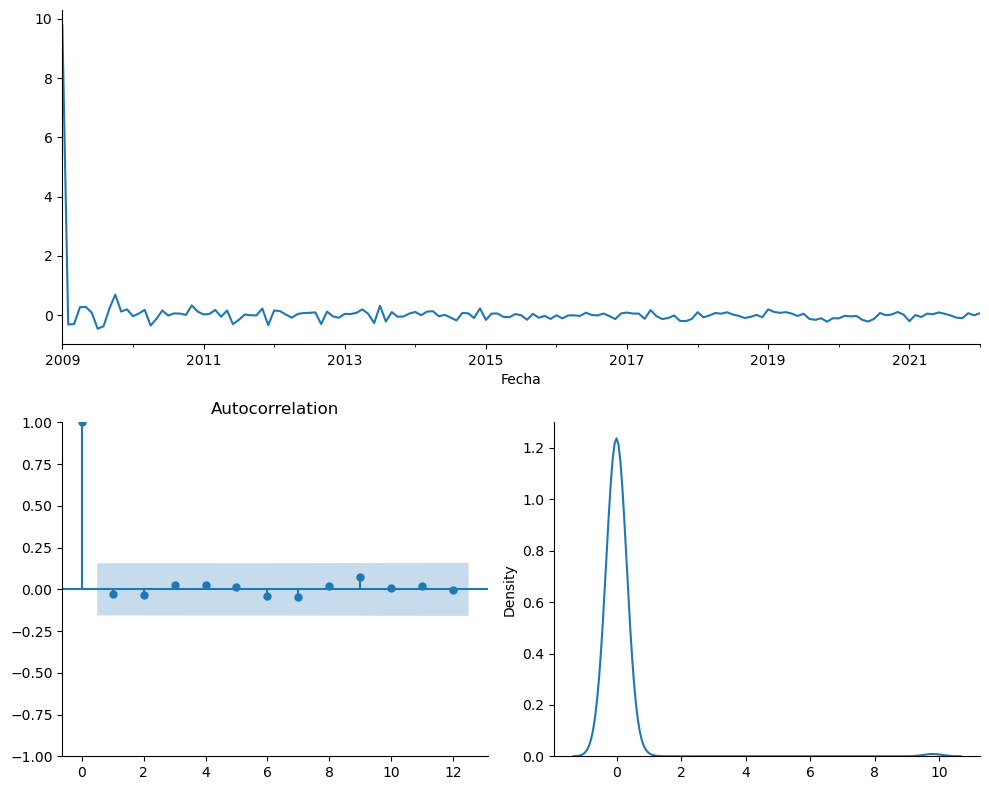

** Mean of the residuals:  0.06

** Ljung Box Test, p-value: 0.953 (>0.05, Uncorrelated)

** Jarque Bera Normality Test, p_value: 0.0 (<0.05, Not-normal)

** AD Fuller, p_value: 0.005 (<0.05, Stationary)


(<Axes: xlabel='Fecha'>,
 <Axes: title={'center': 'Autocorrelation'}>,
 <Axes: ylabel='Density'>)

In [26]:
import scipy.stats as stats
import seaborn as sns

# Función para evaluar residuos a través de contrastes de hipótesis
def residcheck(residuals, lags):
    """
    Function to check if the residuals are white noise. Ideally the residuals should be uncorrelated, zero mean, 
    constant variance and normally distributed. First two are must, while last two are good to have. 
    If the first two are not met, we have not fully captured the information from the data for prediction. 
    Consider different model and/or add exogenous variable. 
        
    If Ljung Box test shows p> 0.05, the residuals as a group are white noise. Some lags might still be significant. 
        
    Lags should be min(2*seasonal_period, T/5)
        
    plots from: https://tomaugspurger.github.io/modern-7-timeseries.html
        
    """
    resid_mean = np.mean(residuals)
    lj_p_val = np.mean(sm.stats.acorr_ljungbox(x=residuals, lags=lags).lb_pvalue)
    norm_p_val =  stats.jarque_bera(residuals)[1]
    adfuller_p = adfuller(residuals)[1]
        
      
    fig = plt.figure(figsize=(10,8))
    layout = (2, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2);
    acf_ax = plt.subplot2grid(layout, (1, 0));
    kde_ax = plt.subplot2grid(layout, (1, 1));
    
    residuals.plot(ax=ts_ax)
    plot_acf(residuals, lags=lags, ax=acf_ax);
    sns.kdeplot(residuals);
    #[ax.set_xlim(1.5) for ax in [acf_ax, kde_ax]]
    sns.despine()
    plt.tight_layout();
    plt.show()
    print("** Mean of the residuals: ", np.around(resid_mean,2))
        
    print("\n** Ljung Box Test, p-value:", np.around(lj_p_val,3), 
        "(>0.05, Uncorrelated)" if (lj_p_val > 0.05) else "(<0.05, Correlated)")
        
    print("\n** Jarque Bera Normality Test, p_value:", np.around(norm_p_val,3),
        "(>0.05, Normal)" if (norm_p_val>0.05) else "(<0.05, Not-normal)")
        
    print("\n** AD Fuller, p_value:", np.around(adfuller_p,3), 
        "(>0.05, Non-stationary)" if (adfuller_p > 0.05) else "(<0.05, Stationary)")
    
    return ts_ax, acf_ax, kde_ax   
    
residcheck(arima_auto.resid(),12)